In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:
wineData = load_wine()
X = wineData.data
y= wineData.target

In [5]:
X.shape

(178, 13)

In [20]:
scaler = StandardScaler()
XScaler = scaler.fit_transform(X)

In [21]:
print(XScaler[0])

[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
  1.01300893]


In [48]:
pca = PCA(n_components=3)
pca.fit(XScaler)
print(pca.explained_variance_ratio_)


[0.36198848 0.1920749  0.11123631]


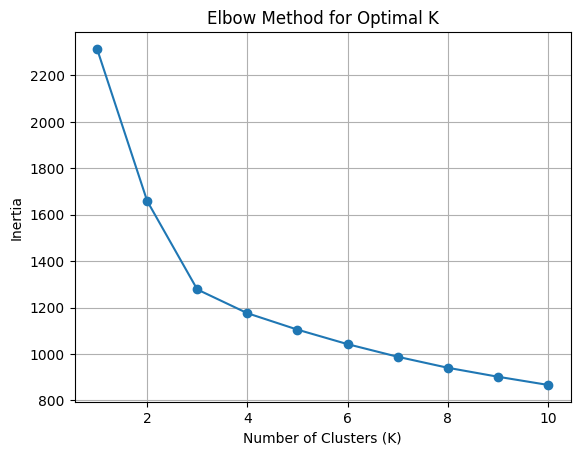

In [51]:
inertia_list = [] 
k_values = range(1, 11) 
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    kmeans.fit(XScaler)
    inertia_list.append(kmeans.inertia_)


plt.plot(k_values, inertia_list, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [52]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=2)
kmeans.fit(XScaler)
print(kmeans.inertia_)

1277.928488844642


In [54]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(XScaler)
print(f"New shape after PCA: {X_pca_2.shape}")

New shape after PCA: (178, 2)


In [55]:
kmeans_final = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans_final.fit_predict(X_pca_2)
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


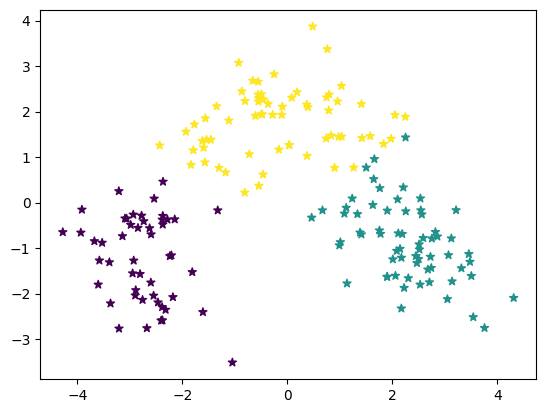

In [56]:
plt.scatter(X_pca_2[:, 0],X_pca_2[:, 1],c=clusters,marker="*")
plt.show()